In [1]:
import numpy as np
np.random.seed(123)

In [14]:
from keras.models import Sequential # Keras model module
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [ ]:
from keras.datasets import mnist
# load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
import gzip
import pickle
import sys
f = gzip.open('mnist.pkl.gz','rb')
if sys.version_info < (3,):
    data = pickle.load(f)
else:
    data = pickle.load(f, encoding='bytes')
f.close()
(X_train, y_train), (X_test, y_test) = data

In [16]:
print(X_train.shape)

(60000, 28, 28)


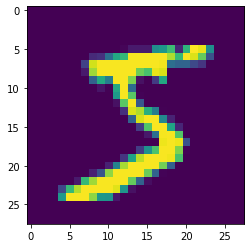

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [18]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
print(X_train.shape)

(60000, 1, 28, 28)


In [19]:
# 转换数据类型，规范化数据
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
print(y_train.shape)

(60000,)


In [21]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [22]:
# 将一维的分类据站转换为十维分类矩阵
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test,10)
print(Y_train.shape)

(60000, 10)


In [23]:
model = Sequential()

W0710 11:25:40.415222  5764 deprecation_wrapper.py:119] From C:\Users\CHJACKSJ\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [24]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))

W0710 11:26:22.290271  5764 deprecation_wrapper.py:119] From C:\Users\CHJACKSJ\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 11:26:22.737909  5764 deprecation_wrapper.py:119] From C:\Users\CHJACKSJ\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 11:26:22.991397  5764 deprecation_wrapper.py:119] From C:\Users\CHJACKSJ\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0710 11:26:22.991397  5764 deprecation_wrapper.py:119] From C:\Users\CHJACKSJ\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Pleas

In [25]:
print(model.output_shape)

(None, 32, 26, 26)


In [26]:
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

W0710 11:26:50.560304  5764 deprecation_wrapper.py:119] From C:\Users\CHJACKSJ\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0710 11:26:50.711954  5764 deprecation.py:506] From C:\Users\CHJACKSJ\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
# add full connected layer and then the output layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [28]:
# compile model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0710 11:27:25.510929  5764 deprecation_wrapper.py:119] From C:\Users\CHJACKSJ\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [29]:
# fit model on training data
model.fit(X_train, Y_train,
         batch_size=32, nb_epoch=10, verbose=1)

C:\Users\CHJACKSJ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until
W0710 11:27:37.187764  5764 deprecation.py:323] From C:\Users\CHJACKSJ\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.2461 - acc: 0.9243 0s - loss: 0.2465 - acc: 
Epoch 2/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.1003 - acc: 0.9705
Epoch 3/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0785 - acc: 0.9767
Epoch 4/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0616 - acc: 0.9817
Epoch 5/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0543 - acc: 0.9836
Epoch 6/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0477 - acc: 0.9851
Epoch 7/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0420 - acc: 0.9865
Epoch 8/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0395 - acc: 0.9873
Epoch 9/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0373 - acc: 0.9884 1s - loss:
Epoch 10/10
60000/60000 [=============================

In [30]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [31]:
print(score)

[0.03258898234275948, 0.9911]
